In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('http://localhost:8888/files/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

C:\Users\Eugene\Anaconda2\envs\bersonenv\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [37]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data.dropna().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


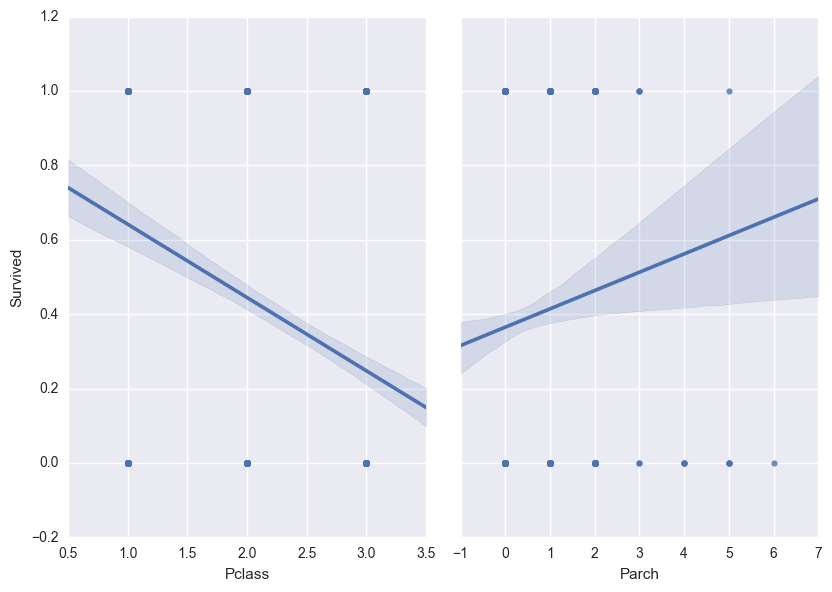

In [40]:
sns.pairplot(data, x_vars=['Pclass','Parch'], y_vars='Survived', size=6, aspect=0.7, kind='reg')

In [41]:
from sklearn.cross_validation import train_test_split
features = np.array([data.Parch, data.Pclass]).T
features  # 2D array

array([[0, 3],
       [0, 1],
       [0, 3],
       ..., 
       [2, 3],
       [0, 1],
       [0, 3]], dtype=int64)

In [42]:
response = np.array([data.Survived]).T 
response  # 1D array

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [43]:
# step 1: split data into training set and test set
features_train, features_test, response_train, response_test = train_test_split(features, response, random_state=4)
# the random_state allows us all to get the same random numbers

In [44]:
features_train

array([[0, 2],
       [0, 3],
       [0, 3],
       ..., 
       [0, 2],
       [0, 1],
       [0, 2]], dtype=int64)

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, response_train)      # Note that I fit to the training
knn.score(features_test, response_test)      # and scored on the test set

C:\Users\Eugene\Anaconda2\envs\bersonenv\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.63228699551569512

In [46]:
X = data[['Parch', 'Pclass']]
y = data['Survived']
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [47]:
scores

array([ 0.61452514,  0.68156425,  0.70786517,  0.75280899,  0.70621469])

In [48]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print linreg.intercept_
print linreg.coef_

0.820560041245
[ 0.05306367 -0.19793906]


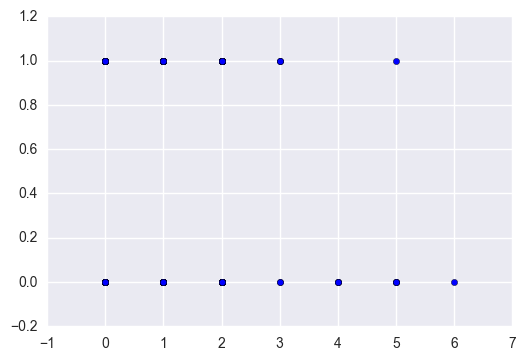

In [59]:
plt.scatter(data.Parch,data.Survived)

In [51]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
linreg.fit(X, y)
assorted_pred = linreg.predict(X)